In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


prepared by Muhirwa Salomon

In [78]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)


In [79]:
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [80]:
X = df[['tip', 'size']]
y = df['total_bill']


In [81]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((195, 2), (49, 2), (195,), (49,))

In [83]:
class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        cost_list=[]
        for _ in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            loss=(1/len(y))*np.sum((y_pred - y)**2) 
            cost_list.append(loss)
            plt.plot(cost_list)
        return cost_list
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    

[491.2155405128206,
 339.411249711923,
 238.77276746618645,
 172.05401284022693,
 127.8219222085769,
 98.49709556783745,
 79.05486869641074,
 66.16420597169044,
 57.61684065227779,
 51.94883091198748,
 48.18967537392873,
 45.695992542855336,
 44.0412607652393,
 42.94272278124535,
 42.212928055678404,
 41.72760840150063,
 41.404381545528345,
 41.18863293644358,
 41.0441562744423,
 40.9469487730053,
 40.88109780897237,
 40.83605403107473,
 40.80482360292685,
 40.78276977415891,
 40.76681839765276,
 40.7549312375524,
 40.74575680565813,
 40.7383988879365,
 40.732263092150035,
 40.726955118566515,
 40.722213319806286,
 40.71786399222505,
 40.7137917368707,
 40.70991981061756,
 40.706197100158334,
 40.702589486533675,
 40.699074120311565,
 40.695635626344774,
 40.69226358771727,
 40.68895087771302,
 40.68569255397074,
 40.68248512533293,
 40.67932606576873,
 40.676213492091335,
 40.673145950261784,
 40.67012227367916,
 40.667141489193895,
 40.66420275475904,
 40.661305318056165,
 40.6584484

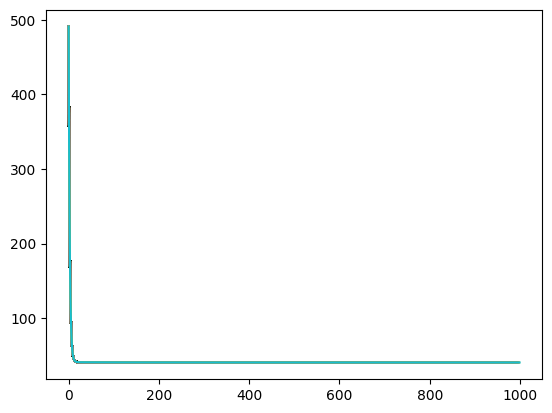

In [84]:
# Train the model
lr = MultipleLinearRegression()
lr.fit(X_train, y_train)



In [85]:
# Make predictions
y_pred = lr.predict(X_test)
